In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['Ankle boot', 'Sneaker', 'Sandal', 'T-shirt/top', 'Pullover', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Bag']

In [4]:
new_labels = [9, 7, 5, 0, 2, 6, 4, 3, 1, 8]
y_train = [0 for i in range(60000)]
y_test = [0 for i in range(10000)]

In [5]:
for i in range(60000):
  y_train[i] = new_labels.index(train_labels[i])
for i in range(10000):
  y_test[i] = new_labels.index(test_labels[i])

In [6]:
print(y_train)

[0, 3, 3, 7, 3, 4, 1, 4, 2, 2, 3, 0, 2, 2, 1, 0, 8, 3, 5, 6, 7, 8, 6, 9, 6, 7, 3, 4, 6, 6, 2, 7, 5, 5, 3, 9, 2, 4, 8, 5, 5, 1, 0, 2, 0, 4, 1, 7, 3, 7, 7, 7, 1, 4, 4, 5, 5, 9, 7, 7, 2, 3, 2, 2, 3, 4, 3, 3, 6, 8, 7, 8, 5, 7, 8, 6, 6, 5, 8, 0, 8, 7, 2, 1, 0, 1, 8, 1, 0, 0, 0, 7, 4, 0, 7, 5, 6, 8, 8, 9, 9, 3, 8, 8, 5, 9, 8, 0, 1, 9, 9, 0, 5, 5, 7, 8, 2, 6, 5, 1, 2, 2, 0, 4, 4, 4, 1, 5, 6, 8, 9, 1, 1, 2, 6, 4, 0, 8, 1, 6, 5, 0, 1, 8, 9, 1, 8, 4, 9, 3, 0, 8, 9, 1, 3, 2, 9, 5, 1, 4, 3, 9, 1, 8, 5, 4, 8, 0, 5, 3, 8, 3, 2, 2, 8, 1, 3, 2, 9, 6, 3, 6, 3, 5, 5, 6, 3, 3, 6, 1, 7, 3, 2, 9, 6, 8, 8, 4, 0, 4, 9, 2, 3, 5, 7, 6, 5, 3, 0, 8, 1, 7, 9, 2, 9, 7, 9, 2, 4, 3, 9, 1, 3, 7, 2, 3, 5, 2, 4, 1, 2, 4, 5, 9, 4, 5, 9, 3, 6, 6, 6, 6, 6, 8, 2, 5, 2, 7, 7, 1, 7, 7, 5, 4, 9, 6, 5, 2, 0, 7, 4, 7, 4, 6, 6, 9, 4, 2, 7, 3, 1, 4, 3, 4, 2, 1, 4, 7, 8, 1, 5, 4, 0, 8, 0, 8, 8, 9, 1, 9, 6, 4, 5, 5, 1, 0, 6, 5, 8, 0, 2, 5, 3, 2, 3, 8, 5, 8, 8, 5, 1, 6, 6, 9, 5, 6, 5, 0, 7, 1, 2, 3, 9, 7, 6, 3, 7, 7, 4, 3, 8, 3, 7, 

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

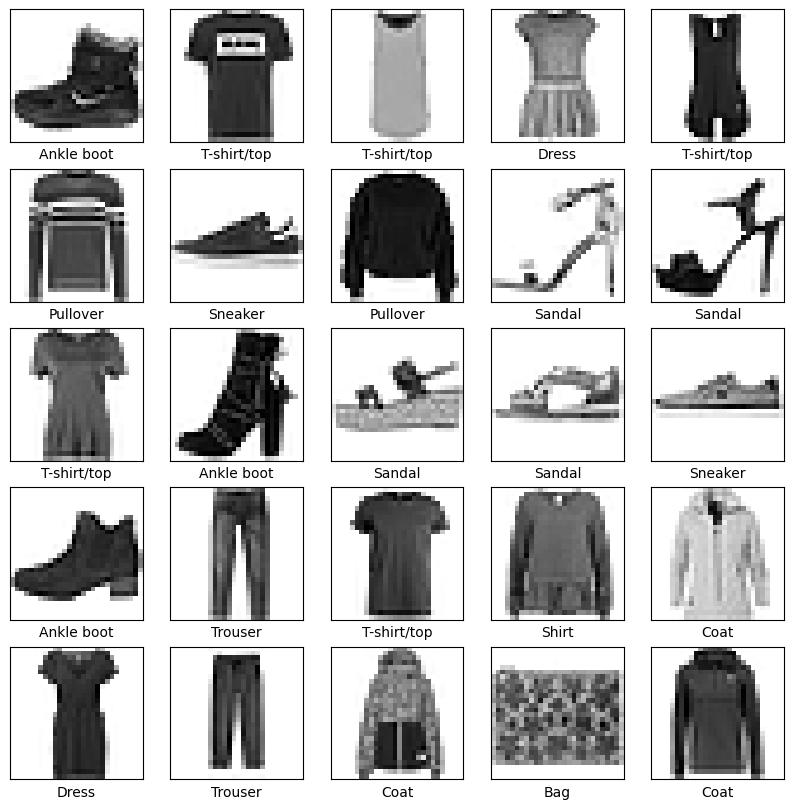

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

In [9]:
x_train = train_images
x_test = test_images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
import keras
from keras import layers

ae_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
])

ae_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
])

ae_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
])

In [11]:
en_1 = tf.keras.Sequential(
    ae_1.layers[:5]
)
en_2 = tf.keras.Sequential(
    ae_2.layers[:5]
)
en_3 = tf.keras.Sequential(
    ae_3.layers[:5]
)

In [12]:
de_1 = tf.keras.Sequential(
    ae_1.layers[5:]
)
de_2 = tf.keras.Sequential(
    ae_2.layers[5:]
)
de_3 = tf.keras.Sequential(
    ae_3.layers[5:]
)

In [13]:
ae_1.compile(optimizer='adam', loss='binary_crossentropy')
ae_2.compile(optimizer='adam', loss='binary_crossentropy')
ae_3.compile(optimizer='adam', loss='binary_crossentropy')

In [76]:
ae_1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 7ms/step - loss: 0.4816 - val_loss: 0.4378
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4083 - val_loss: 0.3875
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3825 - val_loss: 0.3793
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3772 - val_loss: 0.3828
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3734 - val_loss: 0.3747
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3710 - val_loss: 0.3745
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3690 - val_loss: 0.3728
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3668 - val_loss: 0.3670
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3656 - val_loss: 0.3672
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3636 - val_lo

In [77]:
encoded_imgs1 = en_1.predict(x_test)
decoded_imgs1 = de_1.predict(encoded_imgs1)

313/313 [==============================] - 1s 1ms/step


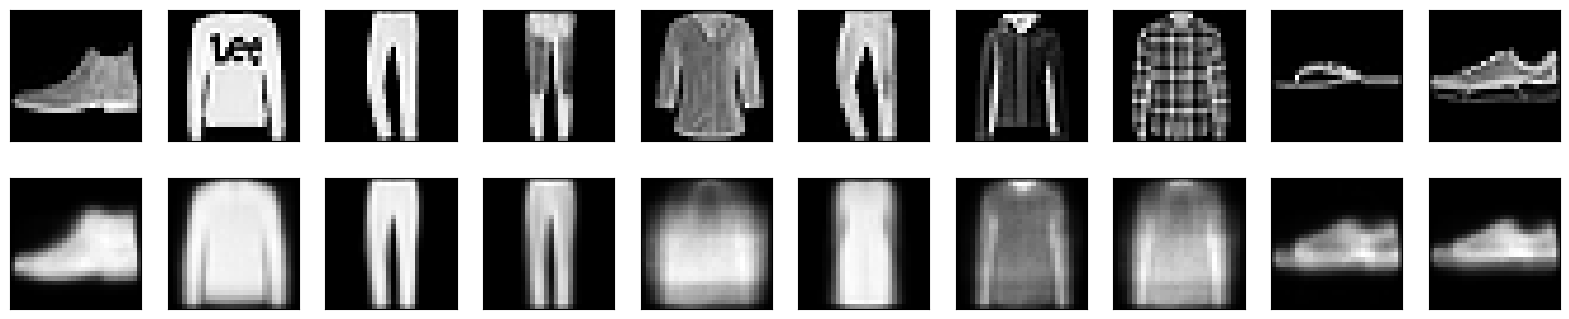

In [78]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [79]:
print(encoded_imgs1[0])
print(test_labels[0])

[2.006962]
9


In [80]:
encoded_imgs11 = en_1.predict(x_test)
t_img1 = encoded_imgs11[0][::-1]
encoded_imgs11[0] = t_img1
decoded_imgs11 = de_1.predict(encoded_imgs11)

313/313 [==============================] - 0s 1ms/step


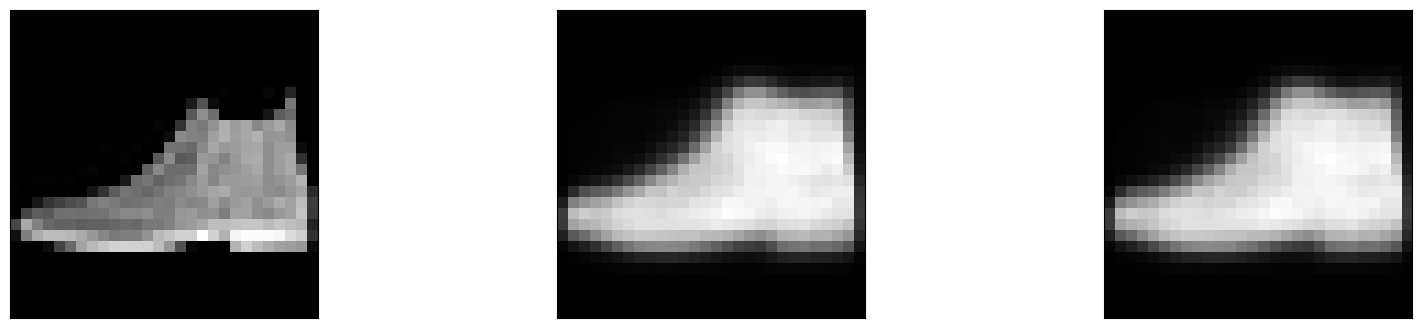

In [81]:
plt.figure(figsize=(20, 4))

ax = plt.subplot(1, 3, 1)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 2)
plt.imshow(decoded_imgs1[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 3)
plt.imshow(decoded_imgs11[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

313/313 [==============================] - 1s 4ms/step


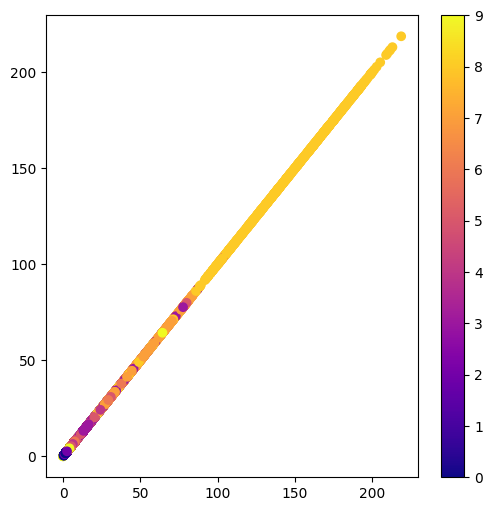

In [95]:
x_test_encoded1 = en_1.predict(x_test)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded1[:, 0], x_test_encoded1[:, 0], c=y_test, cmap='plasma')
plt.colorbar()
plt.show()

In [96]:
t_img1 = [150]
encoded_imgs11[0] = t_img1
decoded_imgs12 = de_1.predict(encoded_imgs11)

313/313 [==============================] - 0s 1ms/step


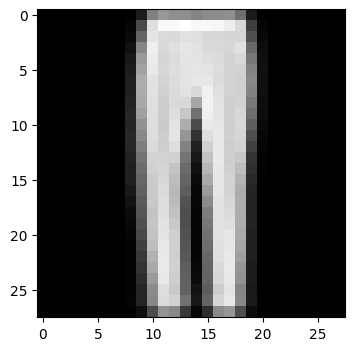

In [97]:
plt.figure(figsize=(20, 4))

plt.imshow(decoded_imgs12[0].reshape(28, 28))
plt.gray()

In [85]:
ae_2.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 5s 7ms/step - loss: 0.4339 - val_loss: 0.3539
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3445 - val_loss: 0.3407
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3370 - val_loss: 0.3376
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3342 - val_loss: 0.3351
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3327 - val_loss: 0.3336
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3311 - val_loss: 0.3328
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3299 - val_loss: 0.3315
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3289 - val_loss: 0.3298
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3279 - val_loss: 0.3308
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3277 - val_lo

In [86]:
encoded_imgs2 = en_2.predict(x_test)
decoded_imgs2 = de_2.predict(encoded_imgs2)

313/313 [==============================] - 1s 2ms/step


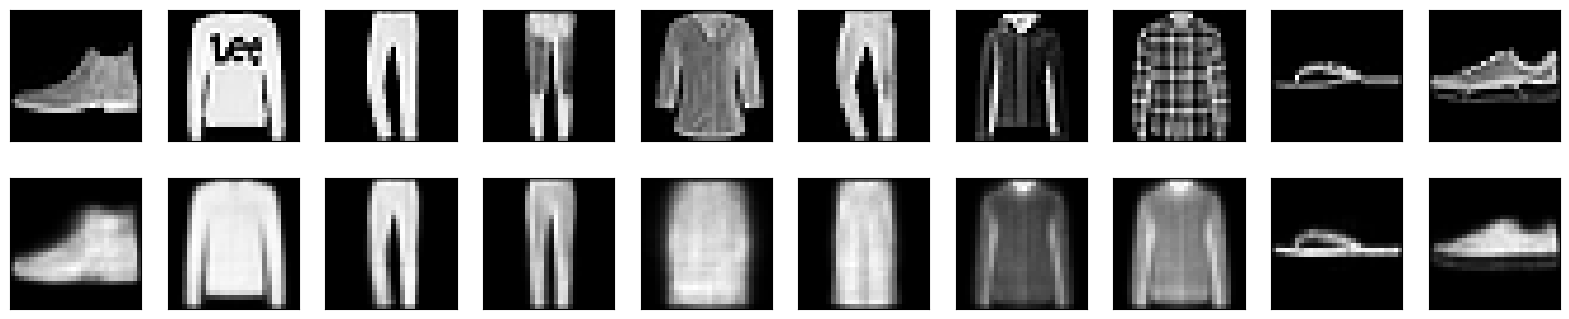

In [87]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [88]:
print(encoded_imgs2[0])
print(test_labels[0])

[15.043762  8.89144 ]
9


In [89]:
encoded_imgs21 = en_2.predict(x_test)
t_img2 = encoded_imgs21[0][::-1]
encoded_imgs21[0] = t_img2
decoded_imgs21 = de_2.predict(encoded_imgs21)

313/313 [==============================] - 0s 1ms/step


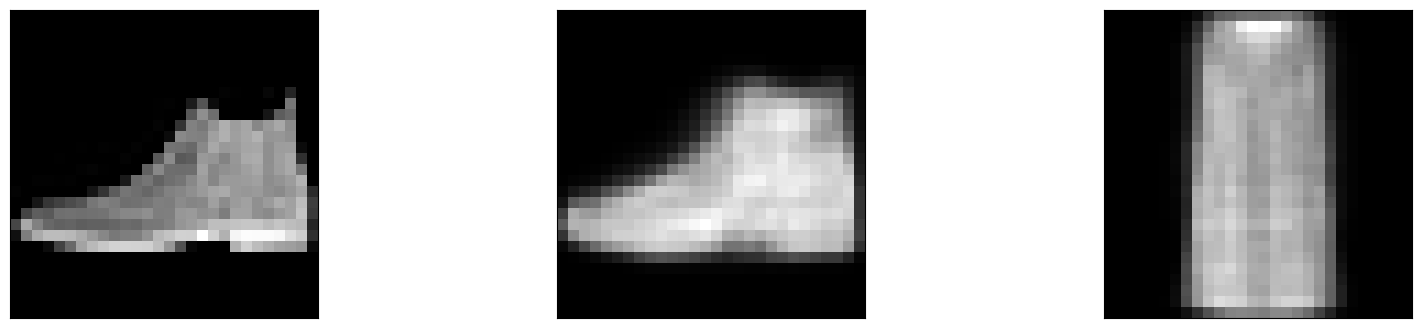

In [90]:
plt.figure(figsize=(20, 4))

ax = plt.subplot(1, 3, 1)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 2)
plt.imshow(decoded_imgs2[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 3)
plt.imshow(decoded_imgs21[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

313/313 [==============================] - 1s 2ms/step


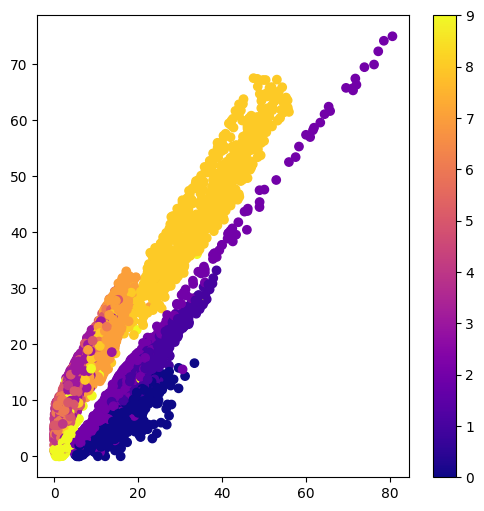

In [94]:
x_test_encoded2 = en_2.predict(x_test)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded2[:, 0], x_test_encoded2[:, 1], c=y_test, cmap='plasma')
plt.colorbar()
plt.show()

In [102]:
t_img2 = [10,0]
encoded_imgs21[0] = t_img2
decoded_imgs22 = de_2.predict(encoded_imgs21)

313/313 [==============================] - 1s 2ms/step


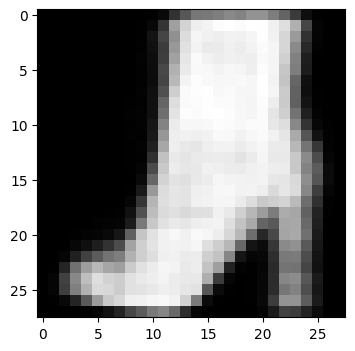

In [103]:
plt.figure(figsize=(20, 4))

plt.imshow(decoded_imgs22[0].reshape(28, 28))
plt.gray()

In [14]:
ae_3.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 7ms/step - loss: 0.4158 - val_loss: 0.3479
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3366 - val_loss: 0.3310
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3252 - val_loss: 0.3238
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3204 - val_loss: 0.3207
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3180 - val_loss: 0.3196
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3165 - val_loss: 0.3177
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3152 - val_loss: 0.3172
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3144 - val_loss: 0.3161
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3137 - val_loss: 0.3159
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3131 - val_lo

In [15]:
encoded_imgs3 = en_3.predict(x_test)
decoded_imgs3 = de_3.predict(encoded_imgs3)

313/313 [==============================] - 1s 1ms/step


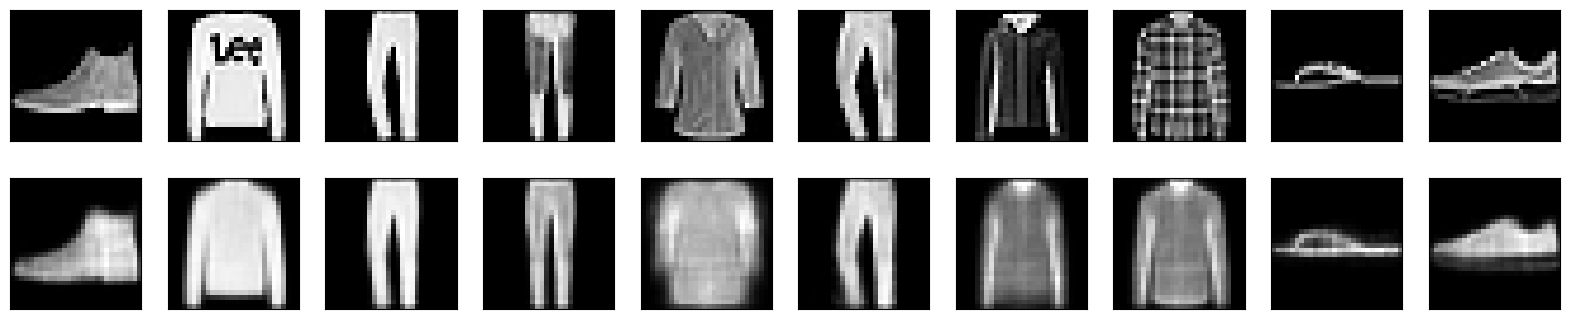

In [16]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
print(encoded_imgs3[0])
print(test_labels[0])

[ 9.83193  23.540625 23.79851 ]
9


In [18]:
encoded_imgs31 = en_3.predict(x_test)
t_img3 = encoded_imgs31[0][::-1]
encoded_imgs31[0] = t_img3
decoded_imgs31 = de_3.predict(encoded_imgs31)

313/313 [==============================] - 0s 1ms/step


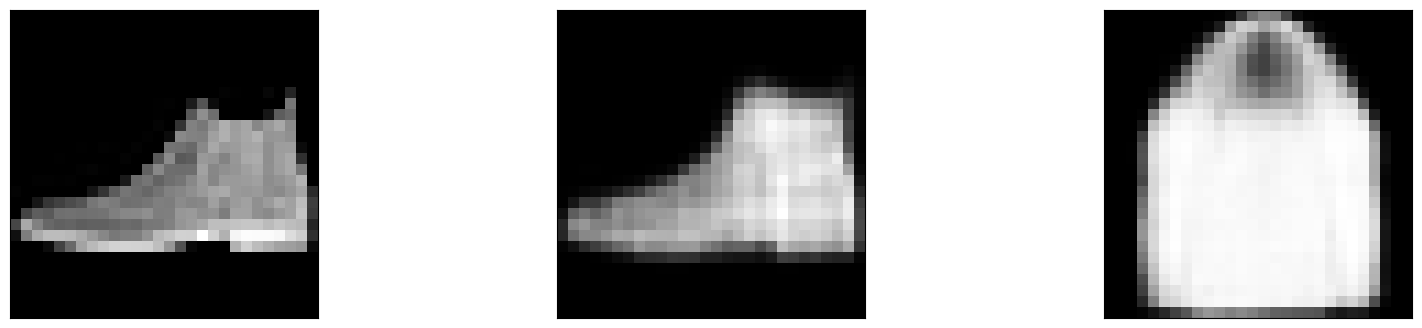

In [19]:
plt.figure(figsize=(20, 4))

ax = plt.subplot(1, 3, 1)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 2)
plt.imshow(decoded_imgs3[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 3)
plt.imshow(decoded_imgs31[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

313/313 [==============================] - 0s 1ms/step


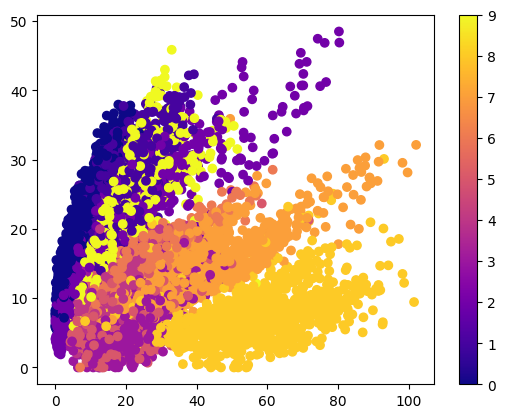

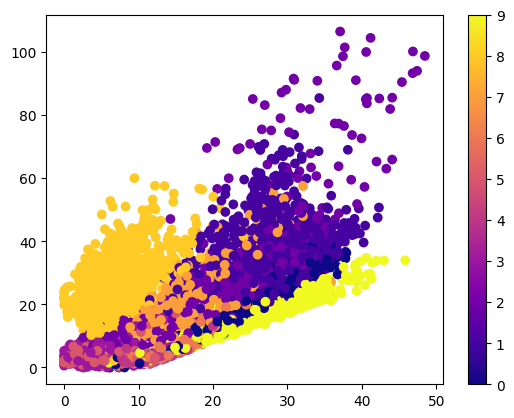

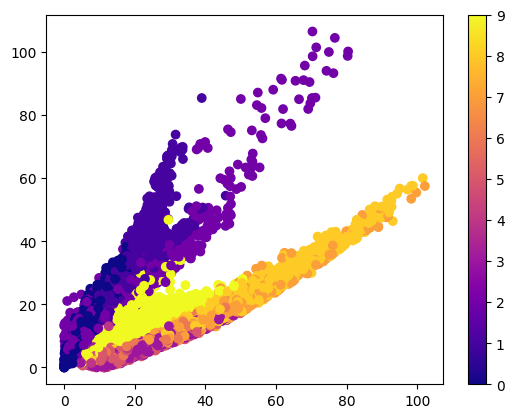

In [20]:
x_test_encoded3 = en_3.predict(x_test)

plt.scatter(x_test_encoded3[:, 0], x_test_encoded3[:, 1], c=y_test, cmap='plasma')
plt.colorbar()
plt.show()

plt.scatter(x_test_encoded3[:, 1], x_test_encoded3[:, 2], c=y_test, cmap='plasma')
plt.colorbar()
plt.show()

plt.scatter(x_test_encoded3[:, 0], x_test_encoded3[:, 2], c=y_test, cmap='plasma')
plt.colorbar()
plt.show()

In [25]:
t_img3 = [10,7,37]
encoded_imgs31[0] = t_img3
decoded_imgs32 = de_3.predict(encoded_imgs31)

313/313 [==============================] - 1s 3ms/step


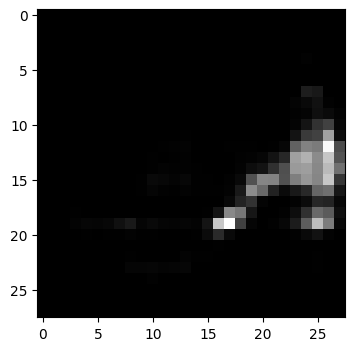

In [26]:
plt.figure(figsize=(20, 4))

plt.imshow(decoded_imgs32[0].reshape(28, 28))
plt.gray()

In [182]:
import numpy as np

vae_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
])
# tf.keras.layers.Dense(32, activation='relu'),
# tf.keras.layers.Dense(64, activation='relu'),
# tf.keras.layers.Dense(128, activation='relu'),
# tf.keras.layers.Dense(784, activation='sigmoid'),
z_2 = vae_2.layers[-1]

eps = np.random.normal(0,1)

In [ ]:
!pip install --upgrade keras

In [2]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

In [3]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon

In [4]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 7, 7, 64)       │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3136)           │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │         50,192 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling (Sampling)       │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = ops.mean(
                ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [14]:
(x_tr, _), (x_ts, _) = fashion_mnist.load_data()
fmnist_digits = np.concatenate([x_tr, x_ts], axis=0)
fmnist_digits = np.expand_dims(fmnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(fmnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - kl_loss: 5.6575 - loss: 379.0254 - reconstruction_loss: 373.3678
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 8.0597 - loss: 284.0987 - reconstruction_loss: 276.0390
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - kl_loss: 7.6230 - loss: 276.7814 - reconstruction_loss: 269.1584
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 7.6142 - loss: 274.5446 - reconstruction_loss: 266.9305
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - kl_loss: 7.5894 - loss: 272.3424 - reconstruction_loss: 264.7531
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 7.6078 - loss: 271.6375 - reconstruction_loss: 264.0297
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 7.5657 - loss: 270.3938 - reconstruction_loss: 262.8281
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 7.5509 - loss: 270.0848 - reconstruction_loss: 262.5338
Epoch 9/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms

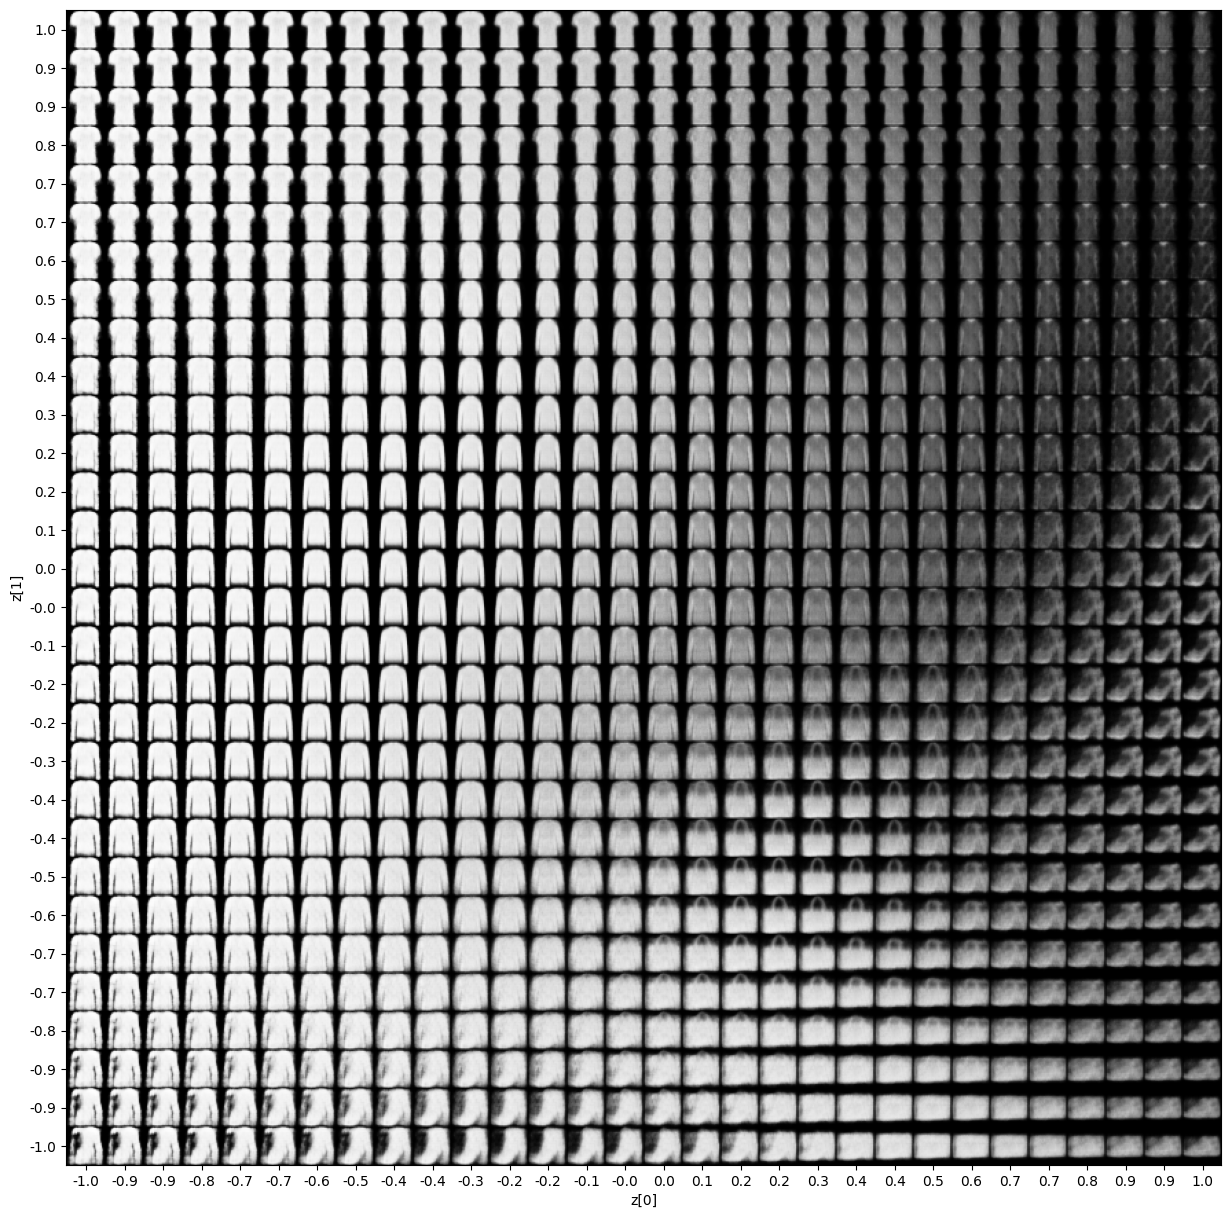

In [15]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

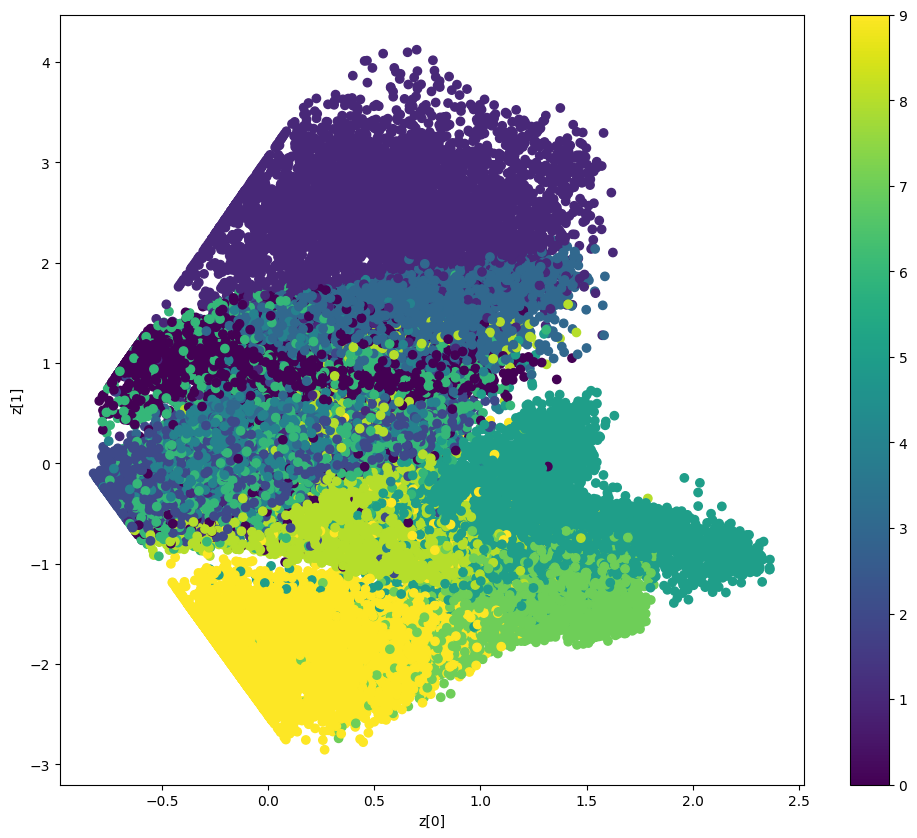

In [16]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train_v, y_train_v), _ = fashion_mnist.load_data()
x_train_v = np.expand_dims(x_train_v, -1).astype("float32") / 255

plot_label_clusters(vae, x_train_v, y_train_v)

In [ ]:
encoded_imgs21_v = vae.encoder.predict(x_test)
t_img2_v = encoded_imgs21_v[0][::-1]
encoded_imgs21_v[0] = t_img2_v
decoded_imgs21_v = vae.decoder.predict(encoded_imgs21_v)

In [29]:
t_img2_v = [-0.2,0.8]
decoded_imgs22_v = vae.decoder.predict(np.array([t_img2_v]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


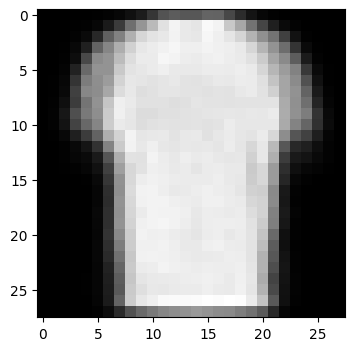

In [30]:
plt.figure(figsize=(20, 4))

plt.imshow(decoded_imgs22_v[0].reshape(28, 28))
plt.gray()